# IMPORT NECESSARY LIBRARIES

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler 
import random 

# READ DATA FROM CSV FILE

In [32]:
iris = pd.read_csv(".\data\IRIS.csv")

# PART A: K-MEANS CLASS

In [42]:
class k_means:
    def __init__(self, k):
        self.x = iris.iloc[:, [0, 1, 2, 3]].values # data to be run
        self.num_sam = self.x.shape[0] # number of samples
        self.num_fea = self.x.shape[1] # number of features
        self.k_clusters = k # number of clusters
        self.learning_rate = 1 # default learning rate
        self.r = np.zeros((self.num_sam,self.k_clusters)) #cluster membership variable array
        self.mu = np.array((self.k_clusters, self.num_fea)) #centroids (cluster means) array __ dimension k x f
        self.distortion_arr = [] # store the distortion of data points 
        self.mu_arr = [] # store the cluster mean of the centroids
        self.initialize_centroids()

    #INITIALIZE RANDOM CENTROIDS 
    def initialize_centroids(self):
        cluster_centroids = []
        for n in range(self.k_clusters):  # k_clusters = 2,3
            centroid = []
            # find min and max of feature and then pick random value between min and max
            for f in range(4):
                f_max = np.amax(self.x[:,f])
                f_min = np.amin(self.x[:,f])
                centroid.append(random.uniform(f_max, f_min))
            cluster_centroids.append(centroid)
        self.mu = np.array(cluster_centroids)
        self.assign_clusters()
        if (not self.valid_centroids()):
            self.initialize_centroids()
    
    #INITIALIZE RANDOM CENTROIDS FROM NUMBER OF CLUSTERS CLARIFIED BY USER
    def initialize_centroids_from_data(self, k):
        rd = random.sample(range(self.num_sam), self.k_clusters)
        centroids = []
        #for each cluster, appoint 1 centroid from the iris data
        for i in range(self.k_clusters):
            centroids.append(x[rd[i],:].tolist())
        self.mu = np.array(centroids)
        self.assign_clusters()

    #ASSIGN DATA POINTS INTO EACH CLUSTERS
    def assign_clusters(self):
        self.r = np.zeros(self.r.shape)
        for n in range(self.num_sam):
            # cluster membership variable
            member = -1
            min_dist = float('inf') 
            for k in range(self.k_clusters):
                #find distance from data point to each centroid
                dist = np.sum(np.square(np.subtract(self.x[n], self.mu[k])))
                # choose cluster with smallest distance
                if dist < min_dist:
                    min_dist = dist
                    member = k
            self.r[n][member] = 1 
        # find distortion of cluster with respect to data points
        self.distortion_arr.append(self.find_distortion())
        self.mu_arr.append(self.mu)
    
    #CHECK IF THERE IS AT LEAST ONE DATA POINT IN EACH CLUSTER
    def valid_centroids(self):
        count = self.r.sum(axis=0)
        #check if any cluster have no data points 
        for k in range(self.k_clusters):
            if (count[k] == 0): return False
        return True

    #CALCULATE NEW CENTROIDS AFTER DATA ASSIGNMENT 
    def find_updated_centroids(self):
        updated = np.zeros(self.mu.shape) 
        #update centroid based on new data
        for k in range(self.k_clusters):
                for n in range(self.num_sam):
                    updated[k] += self.r[n][k]*(self.x[n])
                updated[k] = updated[k]/self.r.sum(axis=0)[k]
        return updated
    
    #CALCULATE THE DISTORTION OF EACH CLUSTER WITH RESPECT TO DATA POINTS
    def find_distortion(self):
        D = 0
        for n in range(self.num_sam):
            for k in range(self.k_clusters):
                D += np.sum(self.r[n][k] * (self.x[n] - self.mu[k])**2)
        return D
    
   #CHECK IF THERE IS ANY CHANGES IN THE LOCATION OF CENTROIDS SO THAT THE ITERATION CAN STOP 
    def converged(self): 
        update_mu = self.find_updated_centroids()
        return np.array_equiv(self.mu, update_mu)

    #UPDATE THE CENTROIDS AFTER NEW DATA ASSIGNMENT 
    def update_centroids(self):
        self.mu = self.find_updated_centroids()
        self.assign_clusters()

    #RETURN THE CURRENT ASSIGNMENT ARRAY OF THE DATA POINTS TO THE CLUSTER
    def get_assignment(self):
        assignment = np.ndarray(self.num_sam)
        #check what sample is in what cluster 
        for n in range(self.num_sam): 
            for k in range(self.k_clusters):
                if (self.r[n][k] == 1):
                    assignment[n] = k
                    break
        return assignment
    
    #CONTINOUSLY ITERATE UNTIL THE CLUSTER LOCATION CONVERGE
    def iterate(self):
        while (not self.converged()):
            self.update_centroids()
            
        



## RUN K_MEANS CLASS WRITTEN ABOVE

In [81]:
test = k_means(3)
test.iterate()
label = ['setosa', 'versicolor', 'virginica']
color = ['blue', 'red', 'green']

## PLOT THE CLUSTER BASED ON DATA POINTS AND K_MEANS CLASS

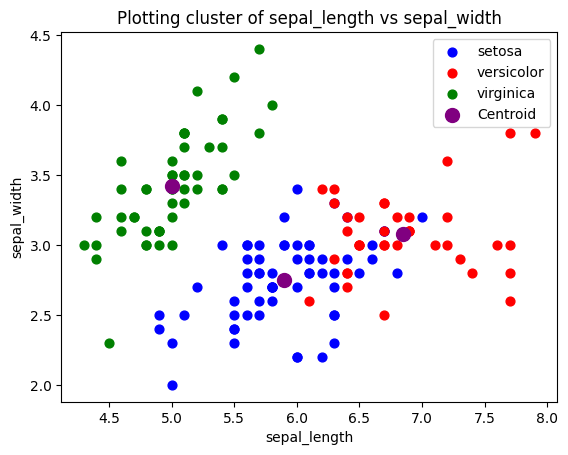

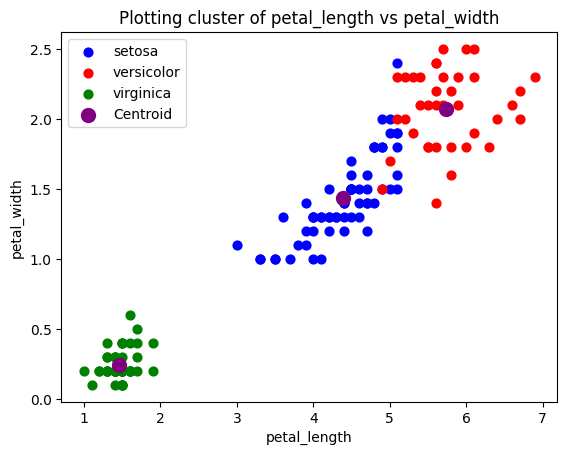

In [82]:
def cluster_plot(): 

    res = test.get_assignment()
    
    # sepal_length vs sepal_width
    for i in range(test.k_clusters):
        plt.scatter(test.x[res == i, 0], test.x[res == i, 1], s=40, c = color[i], label = label[i] )
    plt.scatter(test.mu[:, 0], test.mu[:, 1], s = 100, c = 'purple', label = "Centroid" )
    plt.title('Plotting cluster of sepal_length vs sepal_width')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend()
    plt.show()

    # petal_length vs petal_width
    for i in range(test.k_clusters):
        plt.scatter(test.x[res == i, 2], test.x[res== i, 3], s=40, c = color[i], label = label[i] )
    plt.scatter(test.mu[:, 2], test.mu[:, 3], s = 100, c = 'purple', label = "Centroid" )
    plt.title('Plotting cluster of petal_length vs petal_width')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()
    plt.show()

cluster_plot()


## PART B:  PLOT THE DISTORTION OF EACH CENTROID WITH RESPECT TO NUMBER OF ITERATIONS

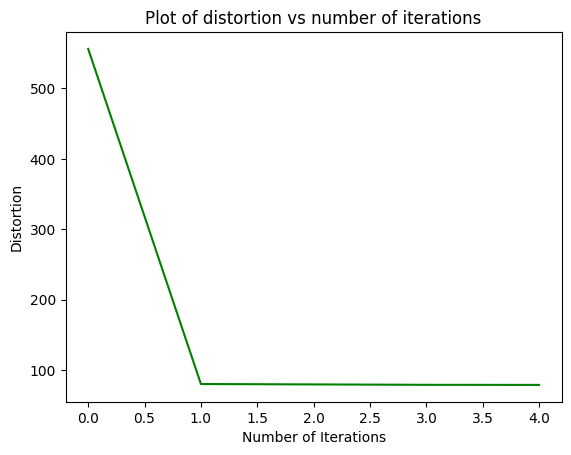

In [87]:
def distortion_plot():
    distortion = np.array(test.distortion_arr)
    plt.plot(range(len(distortion)), distortion, c ='green')
    plt.title('Plot of distortion vs number of iterations')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Distortion")
    plt.show()

distortion_plot()

## PART C: PLOT THE LEARNING PROCESS OF K_MEANS WITH CENTROID FROM INITIAL ->  INTERMEDIATE -> FINAL

### number of clusters = 3

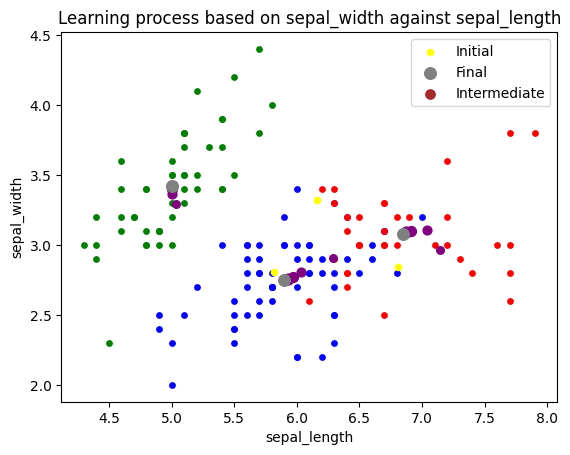

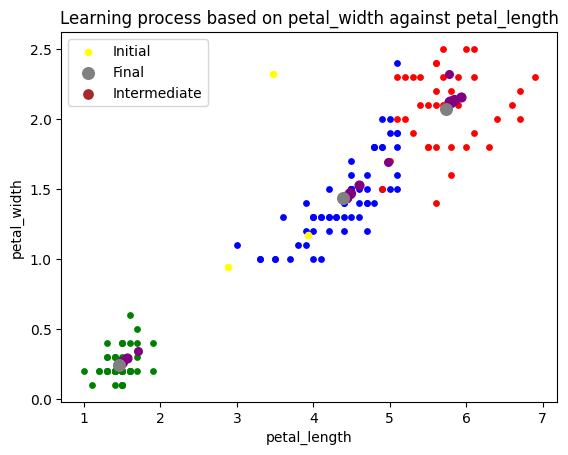

In [84]:
def plot_learning_process(feature_x, feature_y): 
    #final_assignment array
    res = test.get_assignment()
    for i in range(test.k_clusters):
        plt.scatter(test.x[res == i, feature_x], test.x[res == i, feature_y], c= color[i] , s=15)
    c_size = 20
    res = np.transpose(test.mu_arr)
    for i in range(len(test.mu_arr)):
        c_label = ''
        c_color = 'purple'
        if (i == 0): 
            c_label = 'Initial'
            c_color = "yellow"
        if (i == len(test.mu_arr)-1): 
            c_label = 'Final'
            c_color = "grey"
        plt.scatter(test.mu_arr[i][:, feature_x], test.mu_arr[i][:, feature_y], s = c_size, c = c_color, label = c_label)
        c_size += 10
    plt.scatter([], [], c = "brown", s=45, label="Intermediate")
    plt.legend()
    plt.show()
plt.title('Learning process based on sepal_width against sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plot_learning_process(0,1)
plt.title('Learning process based on petal_width against petal_length')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plot_learning_process(2,3)

### number of clusters  = 2

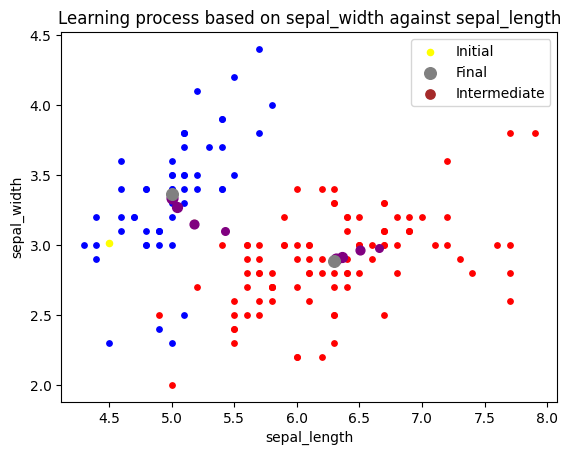

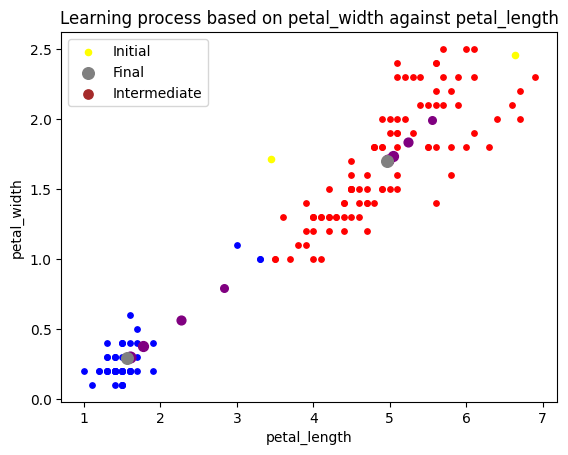

In [85]:
test = k_means(2)
test.iterate()

#Plot learning process based on sepal_width against sepal_length
plt.title('Learning process based on sepal_width against sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plot_learning_process(0,1)

#Plot learning process based on petal_width against petal_length
plt.title('Learning process based on petal_width against petal_length')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plot_learning_process(2,3)

## PART D: PLOT THE DECISION BOUNDARY WITH OPTIMIZED PARAMETERS

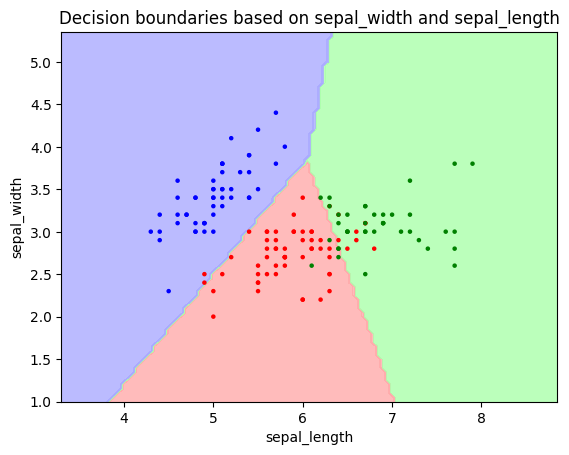

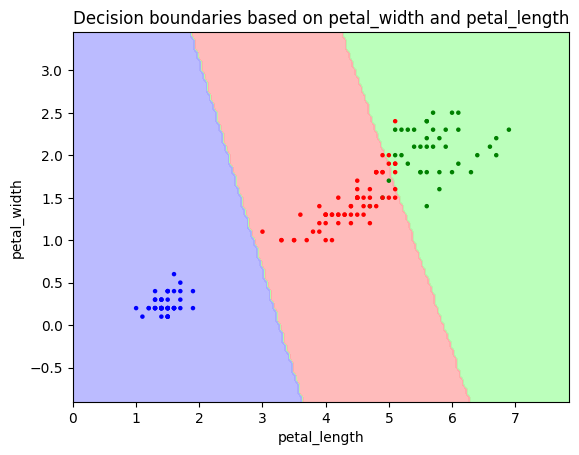

In [86]:
test = k_means(3)
test.iterate()

# Get the final cluster assignments
final_assignment = test.get_assignment()

def plot_decision_boundaries(feature_x, feature_y): #feature_x, feature_y are integer positions of the column corresponding to the features that needs to be plotted 
    # Plot the clusters
    x_min, x_max = test.x[:, feature_x].min() - 1, test.x[:, feature_x].max() + 1
    y_min, y_max = test.x[:, feature_y].min() - 1, test.x[:, feature_y].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    assign_grid = np.zeros(xx.shape)
    for x in range(assign_grid.shape[0]):
        for y in range(assign_grid.shape[1]):
            assign_grid[x][y] = -1
            min_dist = float('inf') 
            for k in range(test.k_clusters):
                centroid = test.mu[k][[feature_x, feature_y]]
                distance_to_k = np.sum(np.square(np.subtract(np.array([xx[x][y], yy[x][y]]), centroid)))
                if distance_to_k < min_dist:
                        min_dist = distance_to_k
                        assign_grid[x][y] = k

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    pcmap = ListedColormap(['red', 'green', 'blue'])
    plt.contourf(xx, yy, assign_grid, cmap=cmap, alpha=.8)
    plt.scatter(test.x[:, feature_x], test.x[:, feature_y], c=test.get_assignment(), cmap=pcmap, s = 5)
    plt.show()

#Plot decision boundaries based on sepal_width against sepal_length
plt.title('Decision boundaries based on sepal_width and sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plot_decision_boundaries(0,1)

#Plot learning process based on petal_width against petal_length
plt.title('Decision boundaries based on petal_width and petal_length')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plot_decision_boundaries(2,3)
 
    

     
